\begin{center}
Chun-Yuan (Scott) Chiu
\end{center}
\begin{center}
chunyuac@andrew.cmu.edu
\end{center}

# Question One {-}

In [1]:
import pandas as pd

bonds = pd.read_csv('bonds.txt', sep='\t', index_col=0)
# bonds = bonds[bonds['CouponRate'] > 6]
n = len(bonds)

bonds.head()

,CouponRate,BidPrice
Case,,
1,7.000,92.94
2,9.000,101.44
3,7.000,92.66
4,4.125,94.50
5,13.125,118.94


In [2]:
n

35

## 1. {-}

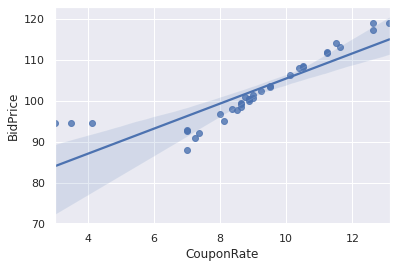

In [3]:
import seaborn as sns

sns.set_theme(color_codes=True)
ax = sns.regplot(x='CouponRate', y='BidPrice', data=bonds)

## 2. {-}

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

olsBonds = sm.OLS.from_formula(formula='BidPrice ~ CouponRate', data=bonds).fit()
olsBonds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BidPrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     99.87
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.64e-11
Time:                        04:26:35   Log-Likelihood:                -98.656
No. Observations:                  35   AIC:                             201.3
Df Residuals:                      33   BIC:                             204.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.7866      2.827     26.458      0.000      69.036      80.537
CouponRate     3.0661      0.307      9.994      0.000       2.442       3.690
==============================================================================
Omnibus:                        3.313   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.262
Skew:                           0.607   Prob(JB):                        0.323
Kurtosis:                       3.276   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. {-}

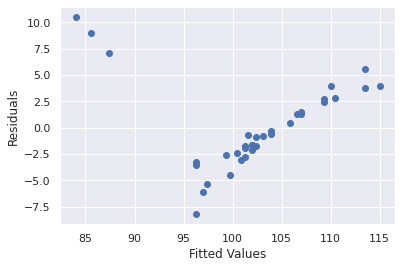

In [5]:
plt.scatter(olsBonds.fittedvalues, olsBonds.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [6]:
import numpy as np

np.array(dir(olsBonds))

array(['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__',
       '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__',
       '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__',
       '__init__', '__init_subclass__', '__le__', '__lt__', '__module__',
       '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_abat_diagonal', '_cache', '_data_attr',
       '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t',
       '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss',
       'compare_f_test', 'compare_lm_test', 'compare_lr_test',
       'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0',
       'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params',
       'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals',
       'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue',
       'get_influence', 'get_prediction

$$
\hat\beta_1 \pm z_{0.025}\text{SE}(\hat \beta_1)
$$
where the standard error is 
$$
\text{SE}(\hat\beta_1)\approx\frac{\hat\sigma}{s_x\sqrt{n-1}}
$$

$$
\hat\sigma^2 = \text{RSS}/(n-2)
$$

In [22]:
import numpy as np
from scipy.stats import norm, t

se = np.sqrt(olsBonds.ssr/(n-2))/(np.std(bonds['CouponRate'], ddof=1)*np.sqrt(n-1))
# z = t.ppf(1 - 0.025, n-2)
z = norm.ppf(1 - 0.025)

(olsBonds.params['CouponRate'] - (z*se), olsBonds.params['CouponRate'] + (z*se))

(2.464778252846198, 3.6674260585957033)

Assumption not correct (fitted-value plot), CI not meaningful



Thus the distribution of the MLE $\hat \alpha$ can be approximated by
$$
N(\hat\alpha, \hat\alpha^2/n) = N(2.626, 0.2626^2).
$$
The MLE $\hat\alpha$ is the best estimator for $\alpha$ in the sense that it is asymptotically efficient, meaning its bias vanishes as $n$ goes to infinity (i.e., asymptotic unbiasedness), and among all asymptotically unbiased estimators, it achieves the lowest possible variance. Given the sample data and the above approximation, our best estimate for $\alpha$ is 2.626 and the standard error of the estimator $\hat\alpha$ is approximately 0.2626. 

# 2. {-}

## (a) {-}

The pdf is 
$$
f(x; \theta) = \frac{\beta^\theta}{\Gamma(\theta)}x^{\theta-1}e^{-\beta x}, \quad 0<x<1, \theta, \beta>0, 
$$
so the Fisher Information is
\begin{align*}
I(\theta) &= E\left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2}\right)\\
&= E\left(-\frac{\partial^2 }{\partial \theta^2}(\theta\log\beta + (\theta-1)\log X -\log\Gamma(\theta)-\beta X) \right)\\
&= E\left(\frac{\partial }{\partial \theta}\frac{\Gamma'(\theta)}{\Gamma(\theta)} \right)\\
&= \frac{\Gamma(\theta)\Gamma''(\theta) - (\Gamma'(\theta))^2}{\Gamma^2(\theta)}. 
\end{align*}


## (b) {-}

Let $\theta_0$ be the true value of $\theta$ and $\hat\theta$ its MLE. When $n$ is large, we have approximately 
\begin{align*}
\hat\theta &\approx N\left(\theta_0, \frac{1}{nI(\theta_0)}\right)\\
&= N\left(\theta_0, \frac{\Gamma^2(\theta_0)}{n(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)}\right).
\end{align*}
Since $\theta_0$ is unknown, so is this distribution. It can be thought of as a distribution family. Given a sample data, in order to obtain a distribution we can work with, the best we can do is to numerically find an estimate using the MLE and replace all $\theta_0$ by this estimate. 


## (c) {-}

By the invariance property, the MLE for $\log(\theta)$ is $\log(\hat\theta)$, whose distribution can be approximated by a normal using the Delta Method. 
Let 
$$
\sigma_n = \sqrt{\frac{\Gamma^2(\theta_0)}{n(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)}}. 
$$
Recall that $\Gamma^2(\theta_0)/(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)$ is the second derivative of $\log\Gamma(\theta)$ at $\theta_0$, which is finite given $\theta_0 > 0$. Thus we know that $\sigma_n\downarrow 0$ as $n\rightarrow\infty$.
Since we have 
$$
\frac{\hat\theta - \theta_0}{\sigma_n} \xrightarrow{D} Z, 
$$
where $Z\sim N(0, 1)$, by the Delta Method with $g(x) = 1/x$, we know that $(g'(\theta_0))^2 = 1/\theta_0^2$ and 
$$
\log(\hat\theta) \approx N\left(\log(\theta_0), \frac{\Gamma^2(\theta_0)}{n\theta_0^2(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)}\right). 
$$
Again here $\theta_0$ is unknown. Given a sample data we can replace it by a maximum likelihood estimate to obtain a workable distribution.



# 3. {-}

## (a) {-}

By the invariance property, the MLE for the odds is 
$$
\frac{\hat p}{1-\hat p}.
$$

## (b) {-}

Let $Y_1, Y_2, \ldots, Y_n$ be i.i.d. from the $\text{Bernoulli}(p)$ distribution. We can write $X = \sum_{i=1}^n Y_i$ and $\hat p = \bar Y$. We also have
\begin{align*}
E(\hat p) &= E(\bar Y) = E(Y_i) = p, \\
V(\hat p) &= V(\bar Y) = V\left(\sum_{i=1}^n Y_i/n\right) = V(Y_i)/n = p(1-p)/n.
\end{align*}
By the CLT, we know that
$$
\frac{\hat p - p}{\sqrt{\frac{p(1-p)}{n}}} \xrightarrow{D} Z. 
$${-}
We want to apply the Delta Method with $g(x) = x/(1-x)$, which requires $g'(p)\neq 0$ and $\sigma_n = \sqrt{p(1-p)/n} \downarrow 0$ as $n\rightarrow\infty$. This is true for all $0<p<1$. We know that 
$$ 
g'(p) = \frac{(1-p)+p}{(1-p)^2} = \frac{1}{(1-p)^2}
$$
and that by the Delta Method
\begin{align*}
\frac{\hat p}{1-\hat p}&\approx N(g(p), (g'(p))^2\sigma_n^2)\\
&= N\left(\frac{p}{1-p}, \frac{1}{(1-p)^4}\frac{p(1-p)}{n}\right)\\
&= N\left(\frac{p}{1-p}, \frac{p}{n(1-p)^3}\right).
\end{align*}
To obtain a workable distribution, plug in $p=\hat p$. 


## (c) {-}

Given the above approximation (the one before plugging in $p=\hat p$), we have
$$
P\left(\frac{\Big| \frac{\hat p}{1-\hat p} - \frac{p}{1-p}  \Big|}{\sqrt{\frac{p}{n(1-p)^3}}} < Z_{\alpha/2}\right) = 1-\alpha, 
$$
where $Z_{\alpha/2}$ is the $100(1-\frac{\alpha}{2})$ percentile point of the standard normal distribution. Hence the confidence interval is
$$
\frac{p}{1-p} \in \left[\frac{\hat p}{1-\hat p}-Z_{\alpha/2}\sqrt{\frac{p}{n(1-p)^3}}, \frac{\hat p}{1-\hat p} + Z_{\alpha/2}\sqrt{\frac{p}{n(1-p)^3}}\right]
$$
Again this interval has an unknown $p$. To obtain a workable interval we plug in $p=\hat p$ and get
$$
\left[\frac{\hat p}{1-\hat p}-Z_{\alpha/2}\sqrt{\frac{\hat p}{n(1-\hat p)^3}}, \frac{\hat p}{1-\hat p} + Z_{\alpha/2}\sqrt{\frac{\hat p}{n(1-\hat p)^3}}\right].
$$


## (d) {-}

We look at the 95% confidence intervals. As the simulation results shown below, only around 65% of the 100,000 sample confidence intervals cover the true value of $p$, not 95%. The bar chart at the bottom shows the first 100 sample confidence intervals. The missing bars are intervals with length 0, which are simulation results with $\hat p=0$. With $p=0.1$ it is understandable that a sample value $\hat p=0$ is not uncommon. Indeed, since the "rules of thumb" $np\geq 5, n(1-p)\geq 5$ are not satisfied, the CLT approximation applied in (b) is not expected to be accurate. So a simulation result like the below is to be expected. 